In [1]:
baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv")
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [2]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [3]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : Factor w/ 93889 levels "Aaban","Aabha",..: 58869 5842 27035 26291 61544 57699 34165 3261 10695 75005 ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : Factor w/ 135 levels "01/01/1880 12:00:00 AM",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [4]:
head(baby)

# 의미 없이 차지하는 데이터 01/01 12:00:00AM

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [5]:
# baby의 Year부분 정리하기 
baby$Year<-substr(baby$Year, 7, 10)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [6]:
# 저장하여 File 크기 비교
# row.names =F -> 꼭 써야하는 부분이다. 
write.csv(baby, "../Data/baby.csv", row.names =F)

In [7]:
# 72.8MB ->50.9MB로 정제되었다. 
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,2014,13972
1825384,Zykeem,M,5,2014,13973
1825385,Zymeer,M,5,2014,13974
1825386,Zymiere,M,5,2014,13975
1825387,Zyran,M,5,2014,13976
1825388,Zyrin,M,5,2014,13977


In [8]:
# baby에서 여자아이만 Female라는 Dataset을 만들고 row수 구하기...
# subset(election, 광역시도 =='서울특별시')
Female <- subset(baby, Gender == 'F')
nrow(Female)

head(Female)

[1] 1081660

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [9]:
# 여자 아이 이름 종류 및 개수 계산
# Vector의 개수는 length 이니까 
length(unique(Female$Name))

[1] 64911

In [10]:
# 가장 많이 사용된 이름 찾기 
# 1) 이름 별 Count의 합계
femaleName <- aggregate(Count ~ Name, Female, sum)
head(femaleName)

Name,Count
Aabha,21
Aabriella,10
Aaden,5
Aadhira,29
Aadhya,639
Aadi,16


In [11]:
# arrange 쓰고 싶으면 
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [12]:
# 2) Count 기준으로 내림차순 정렬하기
head(arrange(femaleName, desc(Count)),20)

Name,Count
Mary,4115282
Elizabeth,1601128
Patricia,1570567
Jennifer,1462742
Linda,1450843
Barbara,1432944
Margaret,1240006
Susan,1120469
Dorothy,1105680
Sarah,1060643


In [13]:
# baby에서 남자아이만 Male이라는 dataset만들고 row수 구하기
Male <- subset(baby, Gender == 'M')
nrow(Male)

[1] 743728

In [18]:
# Female에서 Year별로 Count의 합계 
FFemale <- aggregate(Count ~ Year, Female, sum)
head(FFemale)

Year,Count
1880,90993
1881,91954
1882,107850
1883,112321
1884,129022
1885,133055


In [19]:
# Male에서 year별로 Count의 합계를 구한다.
MMale <- aggregate(Count ~ Year, Male, sum)
head(MMale)

Year,Count
1880,110491
1881,100745
1882,113683
1883,104629
1884,114445
1885,107800


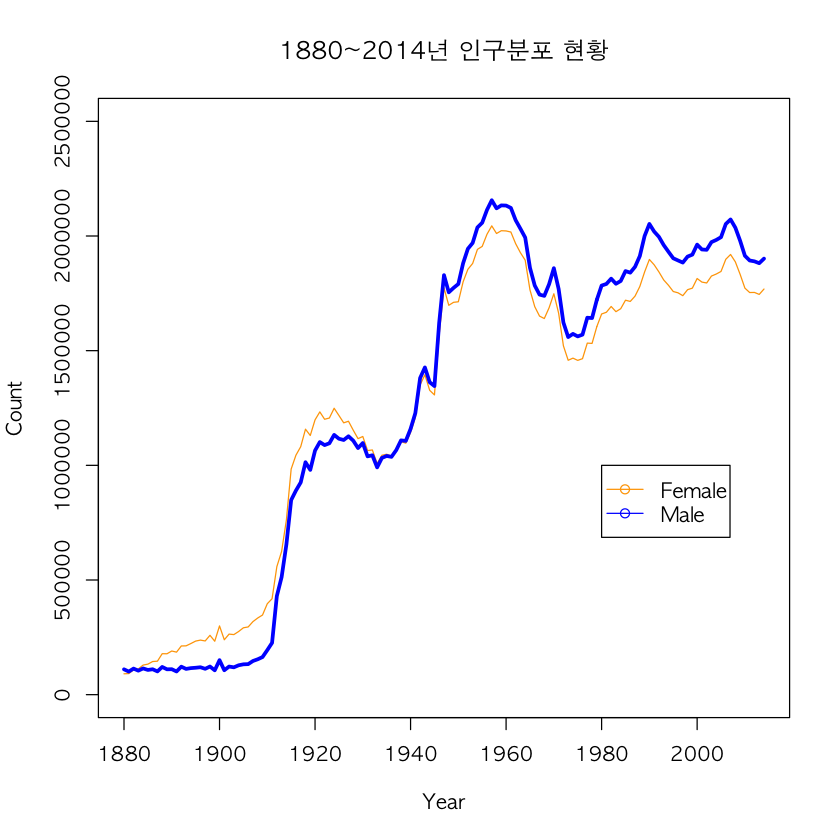

In [67]:
# 선그래프 그리기 
# for mac
options(warn = -1)
par(family = "AppleGothic")



plot(FFemale,
     type ='l', # 선모양 Line 
     main = '1880~2014년 인구분포 현황',
     col = 'orange', # Color 값. -> orange 
     ylim = c(0,2500000)
    )
# def 데이터  - 2
# lines 이름만 다르지 plot와 똑같다.
lines(MMale,
      col = "blue",
      lwd = '3'
     )

# 범례 그리기 -> 각 그래프의 이름? 뭐야?? --> 위치 (어디 그릴꺼야??)-> x축 위치와 y축 위치를 알아야함. 
# 젤 처음 적는게 좌표값
legend(1980, 1000000,
       c('Female', 'Male'),
       col = c("orange", "blue"), #필요없음 fill 쓸때
       #fill = c("orange", "blue"),
       lty = 1,
       pch = 21
      )

----
# Data 시각화 Version 2 -- **** 이버전 잘쓰면 좋다
- 특이해야 살아 남는다

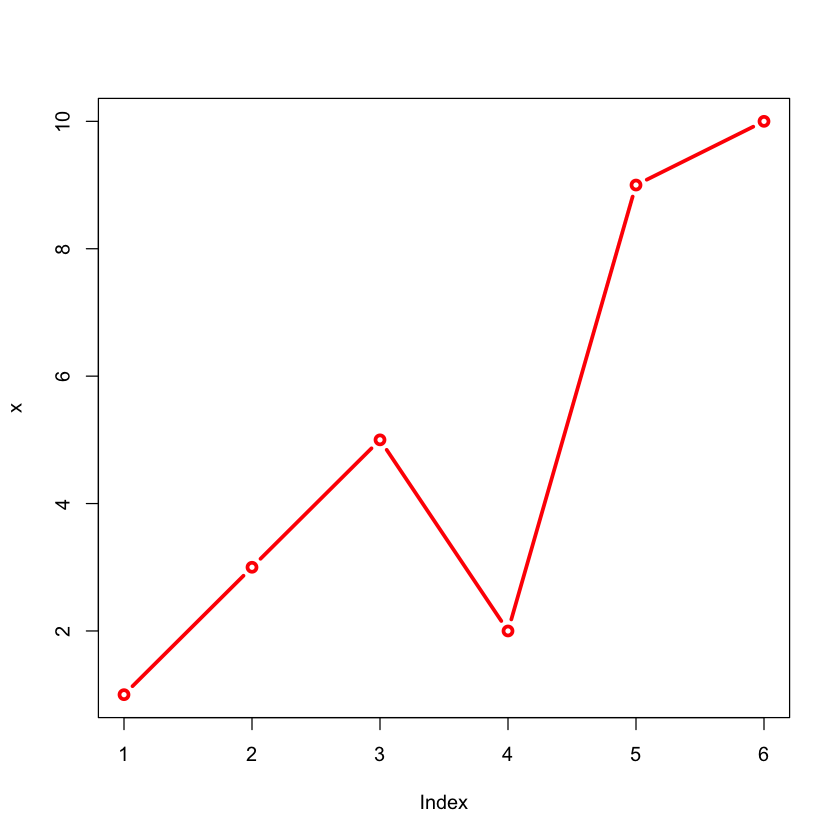

In [66]:
x <- c(1,3,5,2,9,10)
# both type = point,line 둘다 볼수 있다.
# lwd = line width 라인 두꺼워진다.
plot(x,
     type = "b",
     col = 'red',
     lwd = '3'
    )

### 한 화면에 차트 여러개 그려서 비교하기  
- 많이 쓴다??? ***

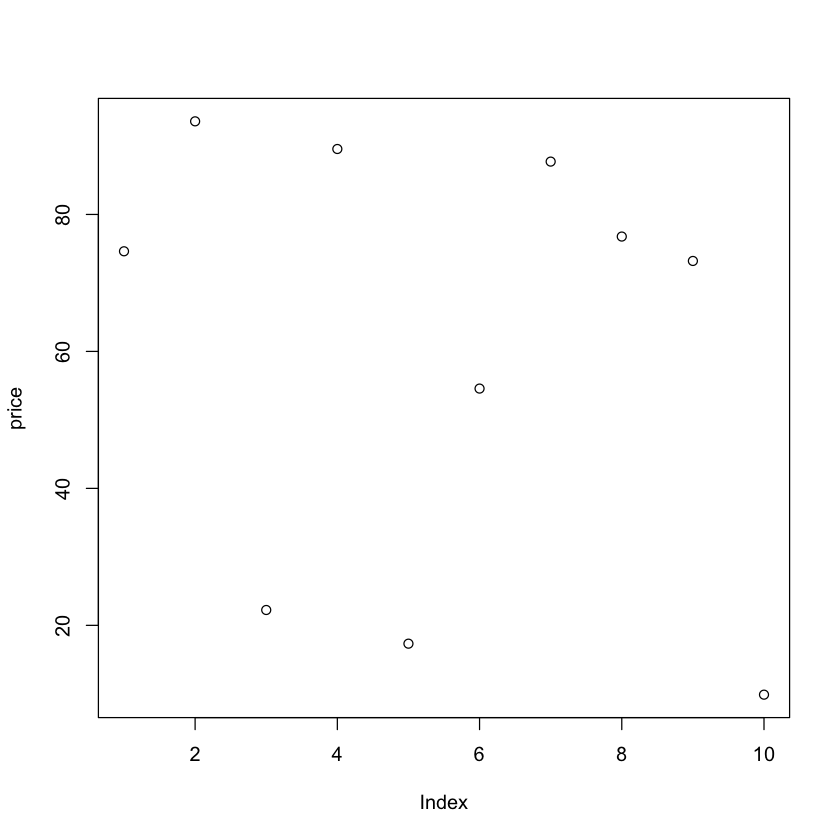

In [69]:
price <- runif(10, 1, 100)
plot(price)

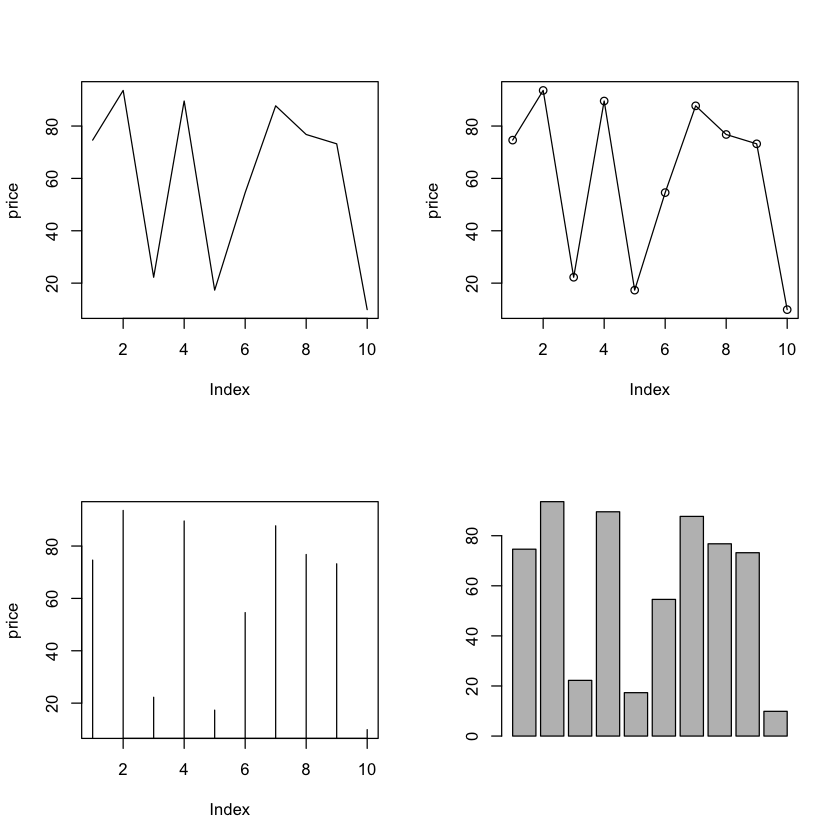

In [78]:
# 위의 것을 하나씩 보는게 힘드니까 
# 2행 2열 차트 그리기 (한 화면에 - >> Type속성으로 비교를 한것) ---- 1
# 한꺼번에 그려보기 위해
par(mfrow = c(2,2))
plot(price, type = 'l')
plot(price, type = 'o')
plot(price, type = 'h')
#plot(price, type = 's')
# barplot도 쓸수 있고 pie도 될수있다
barplot(price)

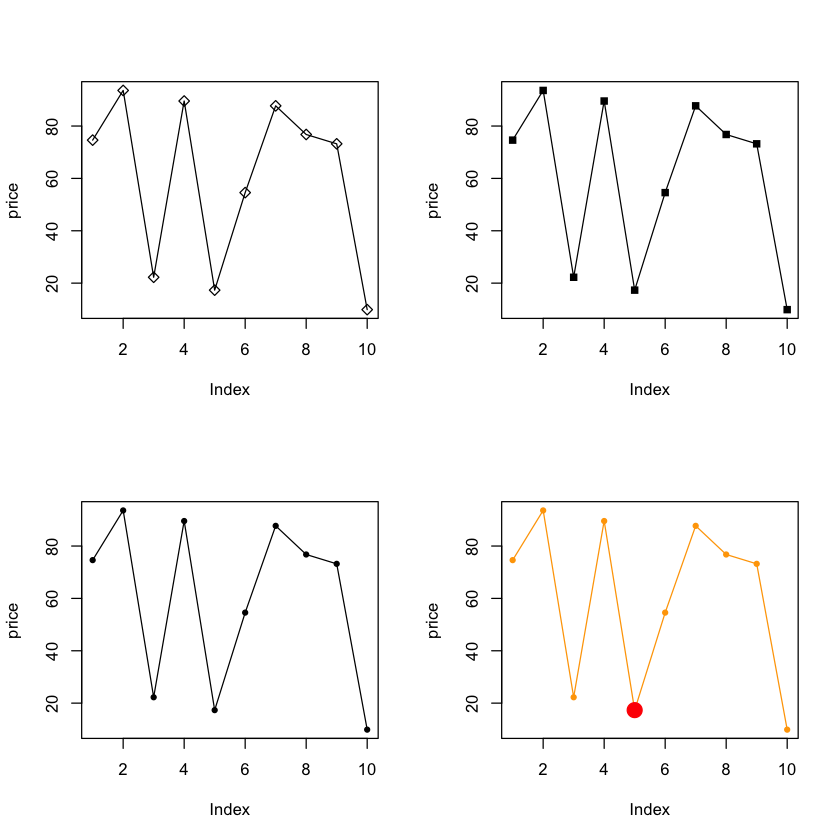

In [91]:
# pch 속성으로 비교 ---- 2

par(mfrow = c(2,2))
plot(price, type = "o", pch = 5)
plot(price, type = 'o', pch = 15)
plot(price, type = 'o', pch = 20)
# 나는 pch 20 번으로 할거야
plot(price, type = 'o', pch = 20,
                        col = c(rep('orange', 4), 'red', rep('orange', 4)), # 컬러 강조
                        cex = c(rep(1, 4), 3, rep(1, 4)), # 컬러 강조된 것 크게 만들기
    )

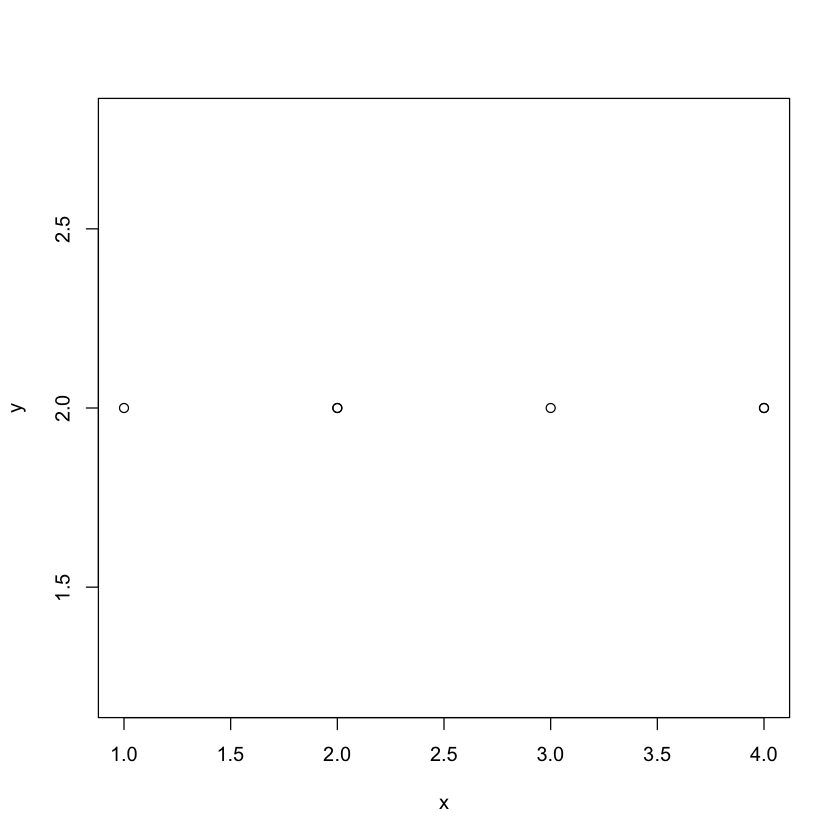

In [92]:
## 중첩 자료 시각화 - 데이터가 똑같을 경우 
x <- c(1,2,3,4,2,4)
y <- rep(2,6)
plot(x,y)

   y
x   2
  1 1
  2 2
  3 1
  4 2

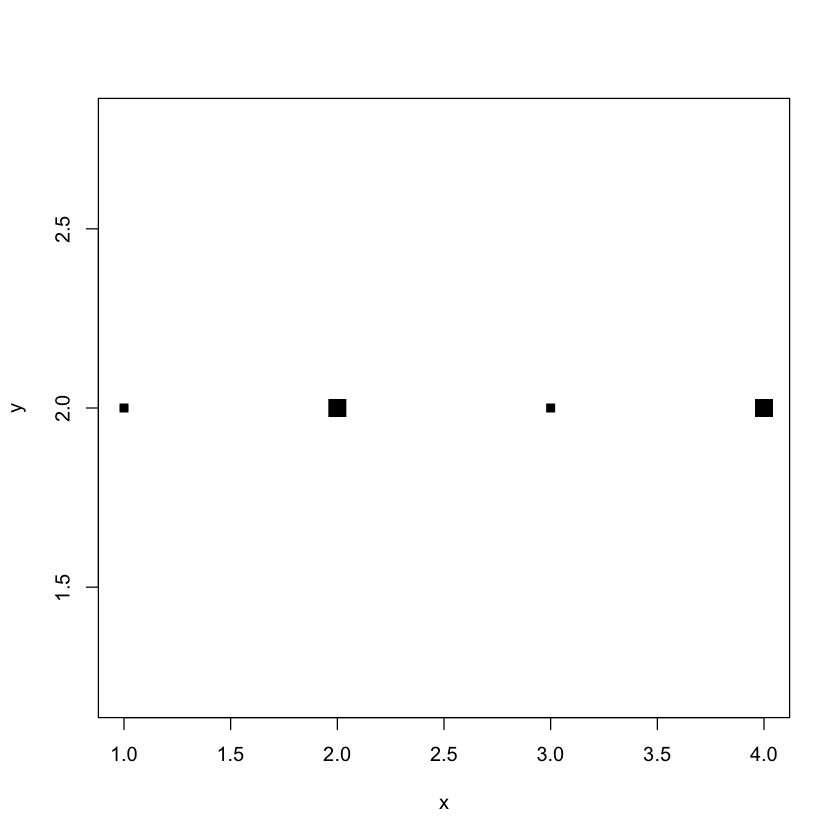

In [95]:
# Method ---- 1 
# 중복된것을 찾아올려고 한다
# table은 빈도수 구하는 값이니까. 
table(x,y)
xy.df <- as.data.frame(table(x,y))
plot(x,y,
     pch = 15, # 네모
     cex = xy.df$Freq
    )


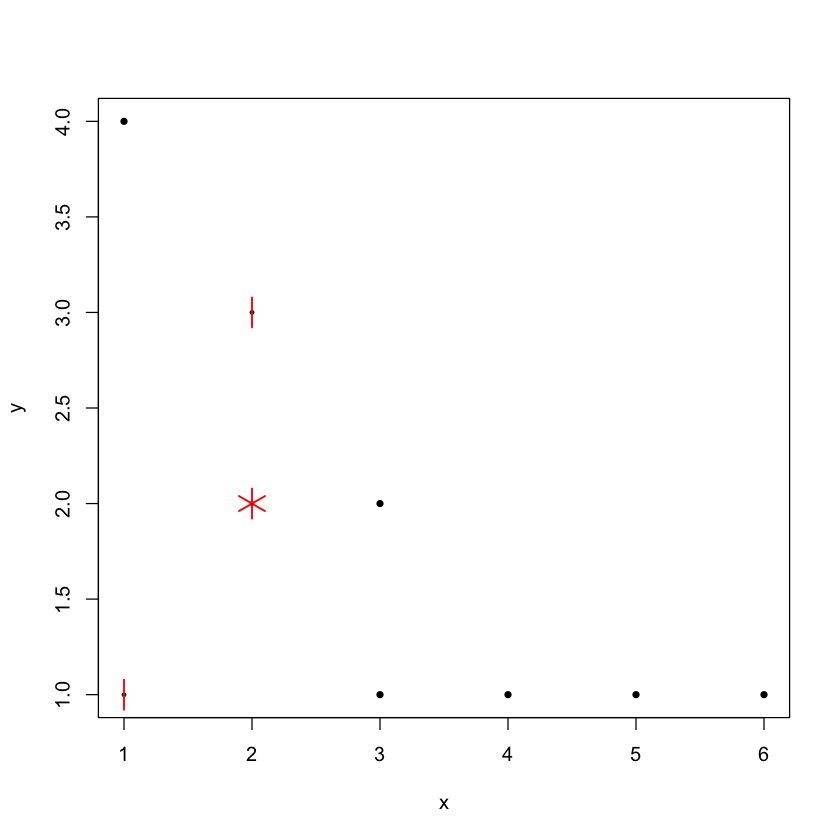

In [102]:
# Method ---- 2
# 먼저 데이터를 중복되게 만들어본다
x <- c(1,1,1,2,2,2,2,2,2,3,3,4,5,6,2,2)
y <- c(1,1,4,2,3,2,2,2,3,2,1,1,1,1,2,2)
# plot(x,y) 중복되서 몇개 안보임
# as 안쓴이유 -> Vector로 그냥 바로 만들어서
z <- data.frame(x,y)
# sunflowerplot(z) = sunflowerplot(x,y) 
# Vector Data 다수용 한다.
# 가로만 2 개있다 가로세로 4개있다는 의미 
sunflowerplot(x,y)

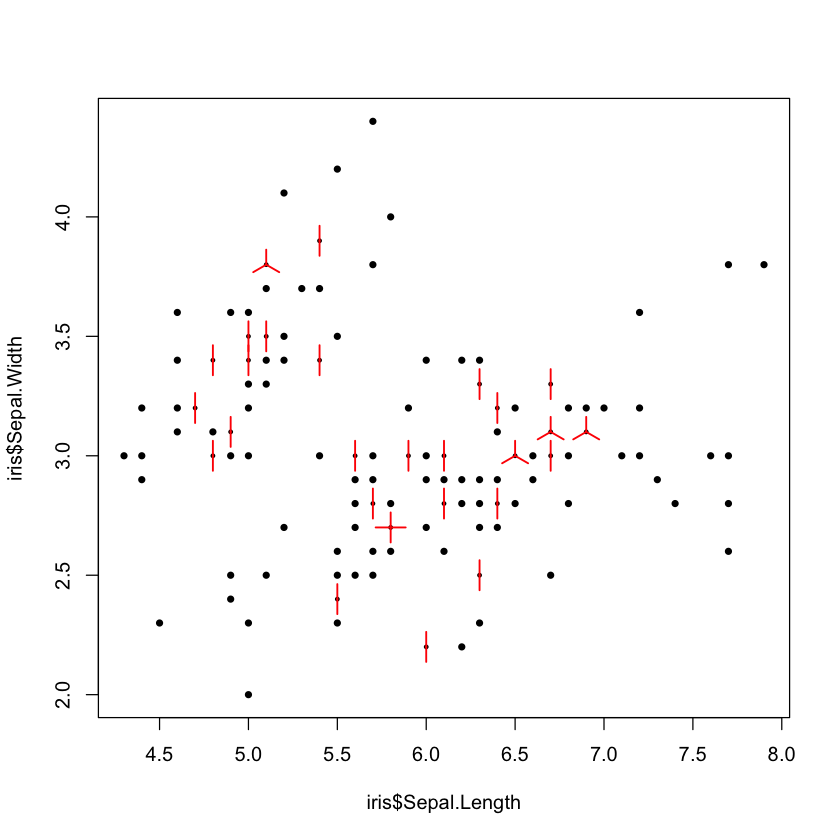

In [105]:
# iris의 Sepal.Length와 Sepal.Width의 중복 시각화 처리
sunflowerplot(iris$Sepal.Length, iris$Sepal.Width)

# chart 2개를 겹쳐서 출력하기

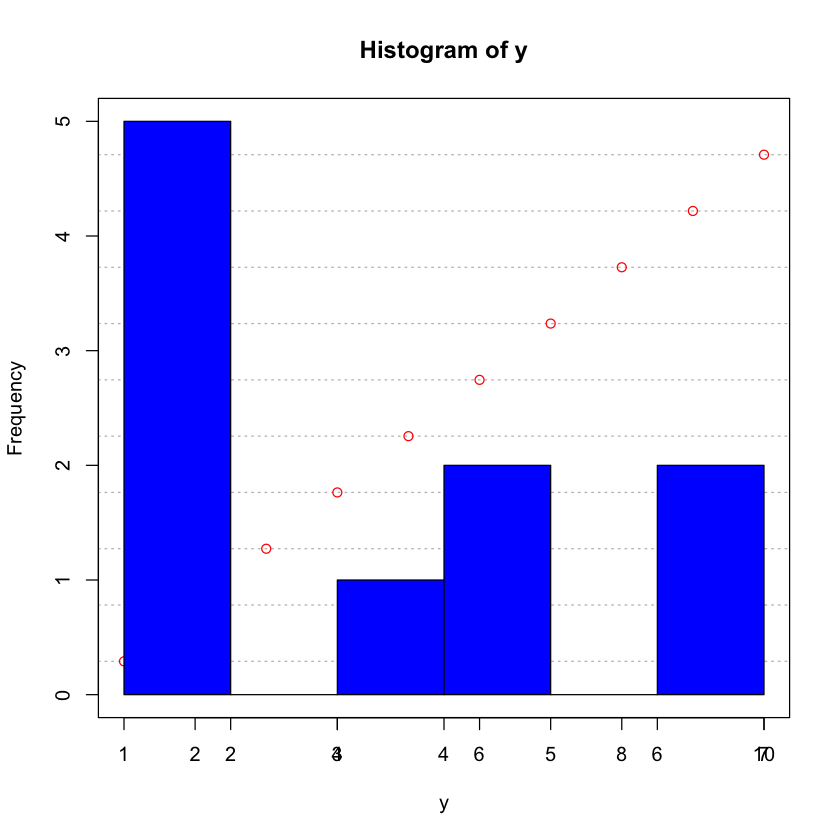

In [108]:
x <- 1:10
dotchart(x, col = "red")
# 그래프 같이쓰고 싶을때 par(new = T)
par(new=T)# 현재 chart를 유지하고 다른 차트를 생성한다.
y <- c(1,2,1,4,5,2,7,7,2,5)
hist(y, col = 'blue')

## 투명도를 추가하기

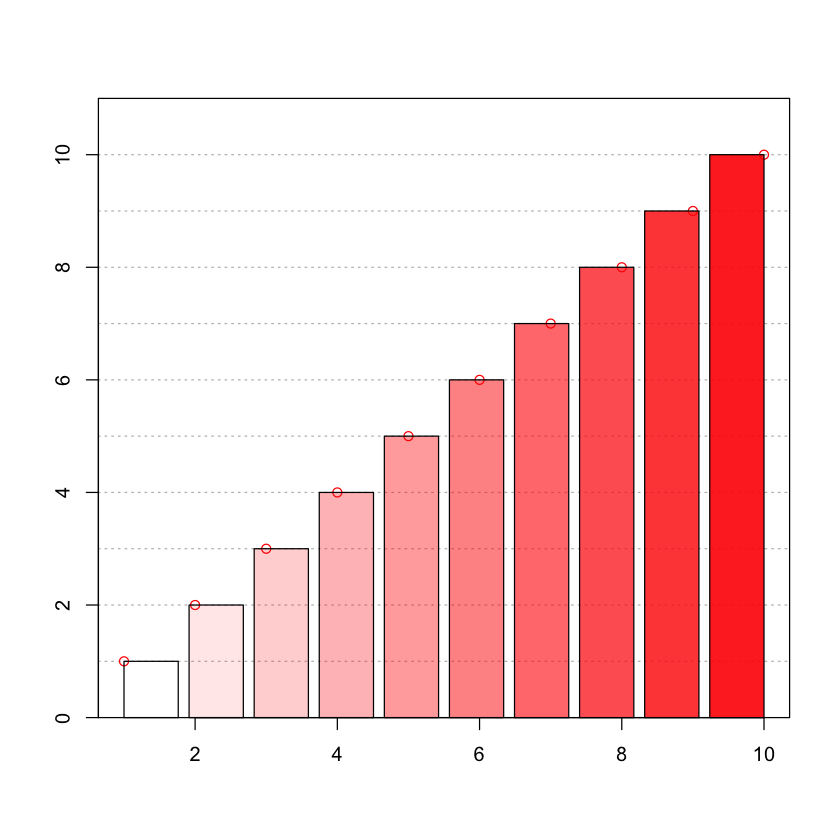

In [123]:
x <- 1:10
dotchart(x, col = 'red')

# 합치자
par(new = T)
mycol <- rgb(1,0,0,seq(0,1,0.1)) # alpha에 그라데이션 주기
barplot(x,
        ylim = c(0,11),
        col = mycol #투명도 주기!! -> 겹치는 부분때문에  
        # red, green, blue, alpha
       )

## 싱자 수염 그래프
- 분석가들이 반드시 써야할 그래프 with plot

In [124]:
abc <- c(110, 300, 150, 280, 310)
summary(abc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    110     150     280     230     300     310 

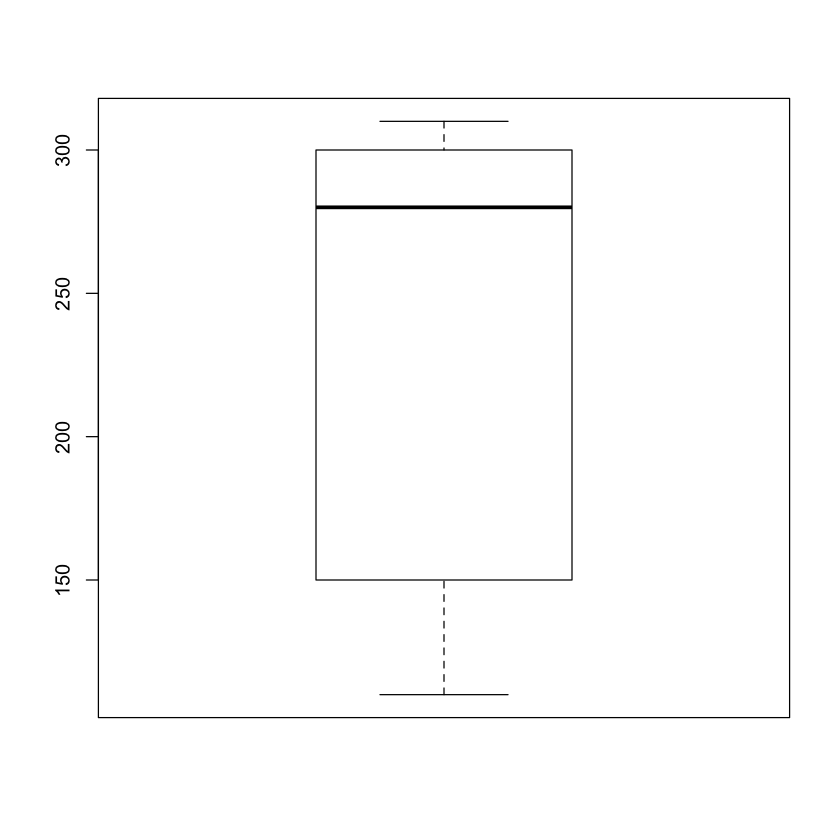

In [125]:
boxplot(abc)

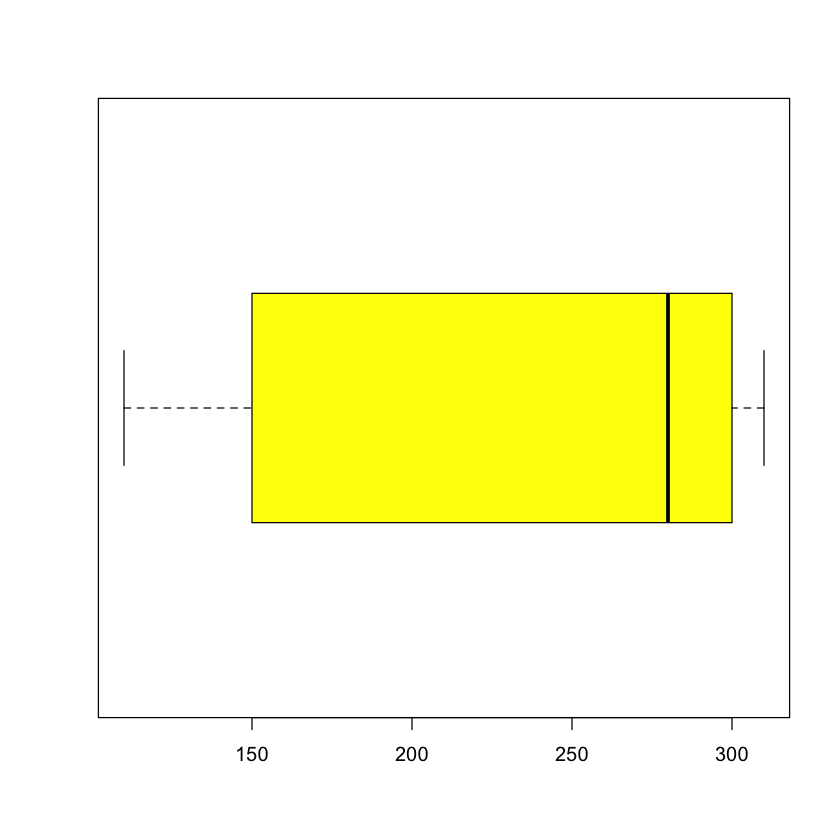

In [129]:
boxplot(abc,
        col = "yellow",
        horizontal = T
       )

In [127]:
def <- c(1,1,1,1,1,2,5)
summary(def)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.714   1.500   5.000 

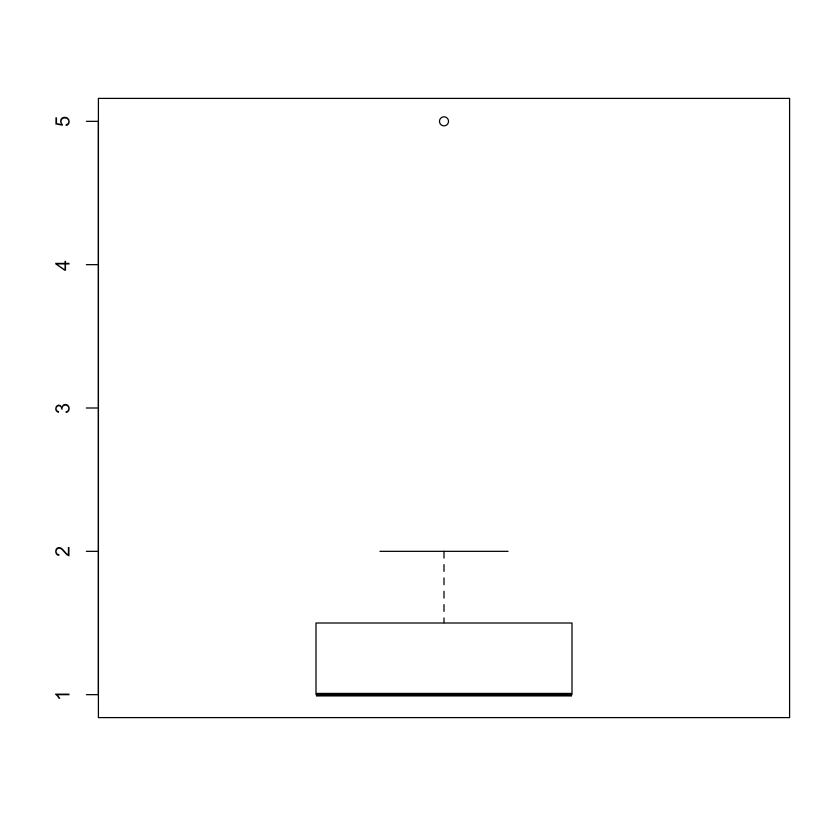

In [128]:
boxplot(def)
# 이상치 볼수 있다. 

In [130]:
# 자동차의 제동거리 
data(cars)
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [131]:
str(cars)

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...


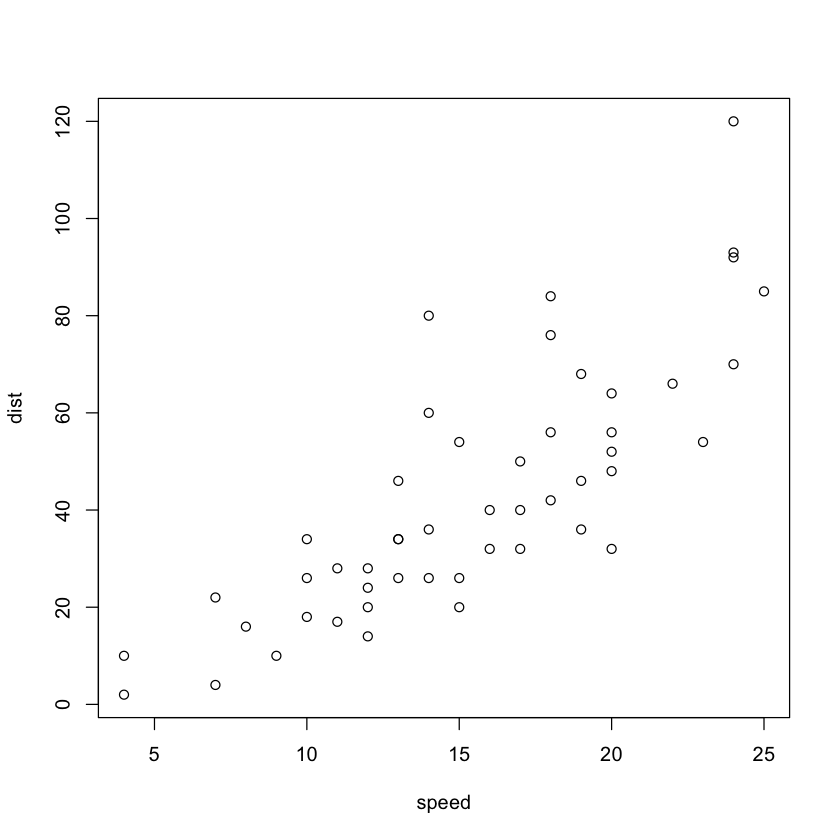

In [132]:
plot(cars)

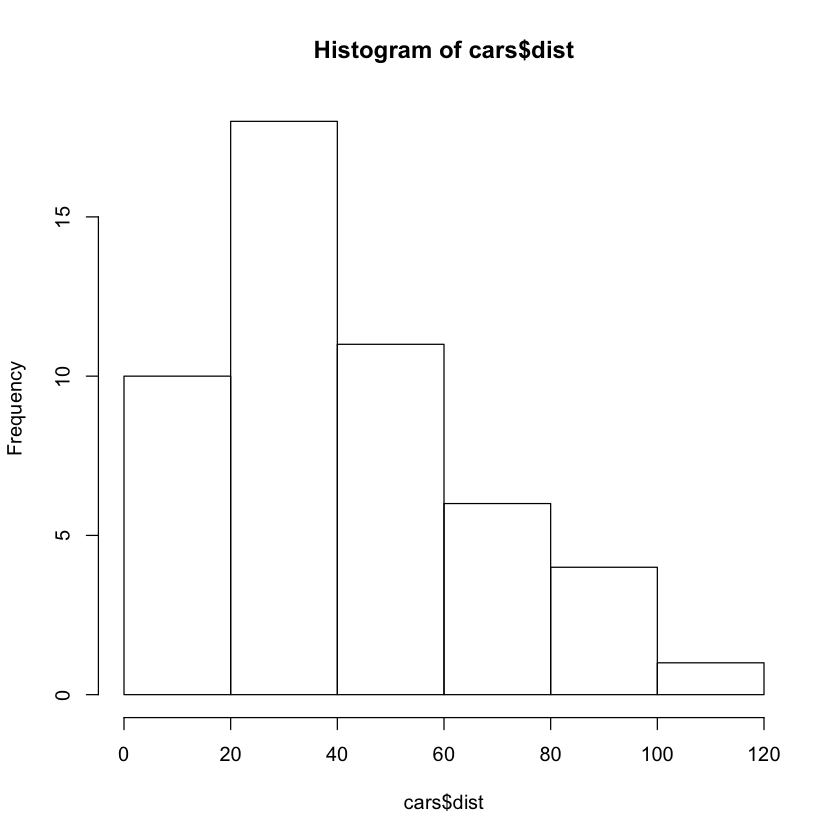

In [134]:
hist(cars$dist)

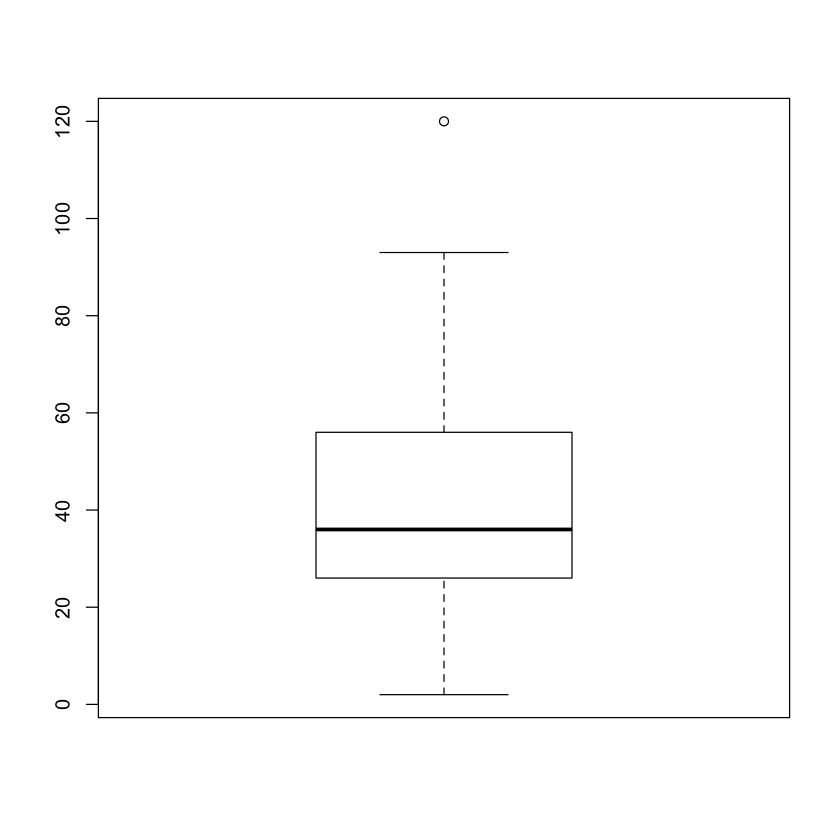

In [135]:
# 이상치 나오면 빼고 계산 하든가 그냥하든가를 판단해라 
# 그러라고 따로 빼주는 것이다. 
# 정제에 필요한 과정이다. 
boxplot(cars$dist)

### 기타 그래프

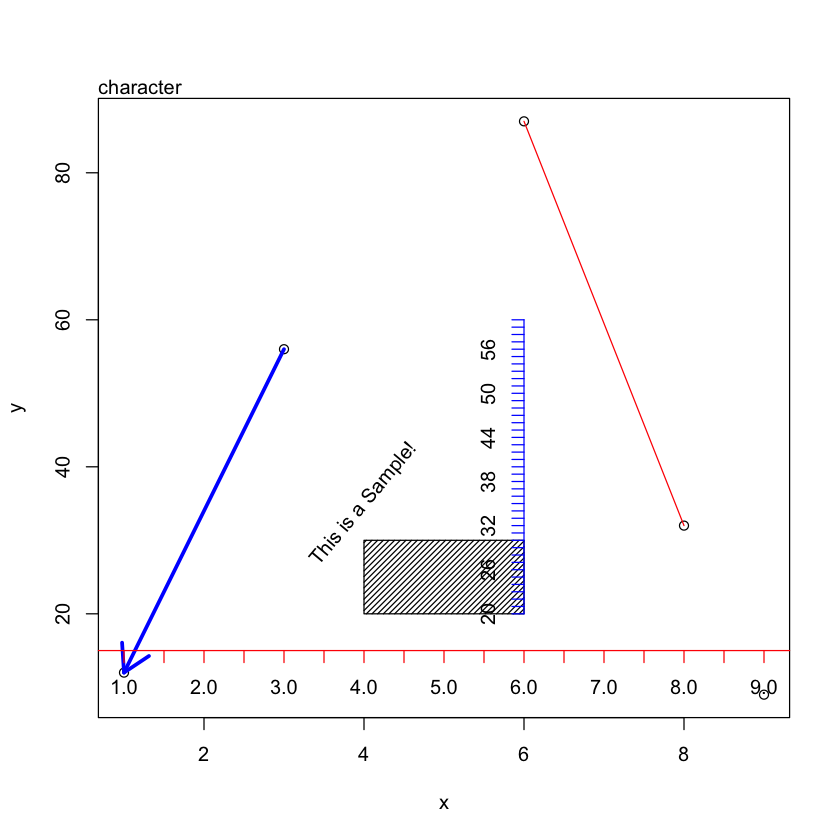

In [172]:
x <- c(1, 3, 6, 8, 9)
y <- c(12, 56, 87, 32, 9)
plot(x,y)

# 필요한 부분만 설명하고 싶을때
# (3,3)과 (4,4)를 연결하는 선분 그리기 
# 선분의 마지막 선은 끝냈다는 의미
# 선의 마지막 화살표 그림은 지금도 진행중이라는 의미
segments(6,87, 8,32, col = 'red')

# 화살표 그리기
arrows(3,56, 1,12, col = 'blue', lwd ='3')

# 사각형 그리기 
rect(4,20, 6,30, density = 30)

# 글자쓰기 *** 진짜 많이 쓴다
# srt 각도 하는것이다. 
text(4,35, "This is a Sample!",srt = 50)

# 테두리 활용하기
# side = 0~4 왼쪽,오른쪽, 위,아래
# adj = 0, 0.5, 1 맨왼쪽, 중앙, 맨오른쪽
mtext("character", side = 3, adj = 0)

# X축의 추가, y축의 40위치에 0~10까지 표시하고 색은 빨간색
# pos = 40 위치는 40 위치에  
# at = seq(0,10,0.5) or at = 0:10
axis(1, pos = 15, at = seq(0,10,0.5), col = 'red')


# y축의 추가, x축의 6위치에 20~60까지 표시하고 색은 파란색
axis(2, pos = 6, at = 20:60, col = "blue")

In [176]:
# 투표수 높은 지역의 후보별 투표수
election <- read.csv("../Data/election_result_ansi.csv", fileEncoding = 'euc-kr')
head(election)

X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359


In [290]:
elec_top5 <- head(arrange(election, desc(pop)), 5)
# t 는 회전 시키는 것이다. 
elec_top5_matrix <- t(elec_top5[,5:7])
elec_top5_matrix


,1,2,3,4,5
moon,239697,177328,165079,175882,176940
hong,100544,98549,86026,76601,69014
ahn,128297,99018,92048,88128,84967


[1] 239697

In [293]:
rownames(elec_top5_matrix) <- c("문재인", "홍준표", "안철수")
colnames(elec_top5_matrix) <- paste(elec_top5$광역시도, elec_top5$시군)


elec_bu <- sum(elec_top5_matrix[,1])
elec_song <- sum(elec_top5_matrix[,2])
elec_nam <- sum(elec_top5_matrix[,3])
elec_gangs <- sum(elec_top5_matrix[,4])
elec_hwa <- sum(elec_top5_matrix[,5])


[1] 51.16

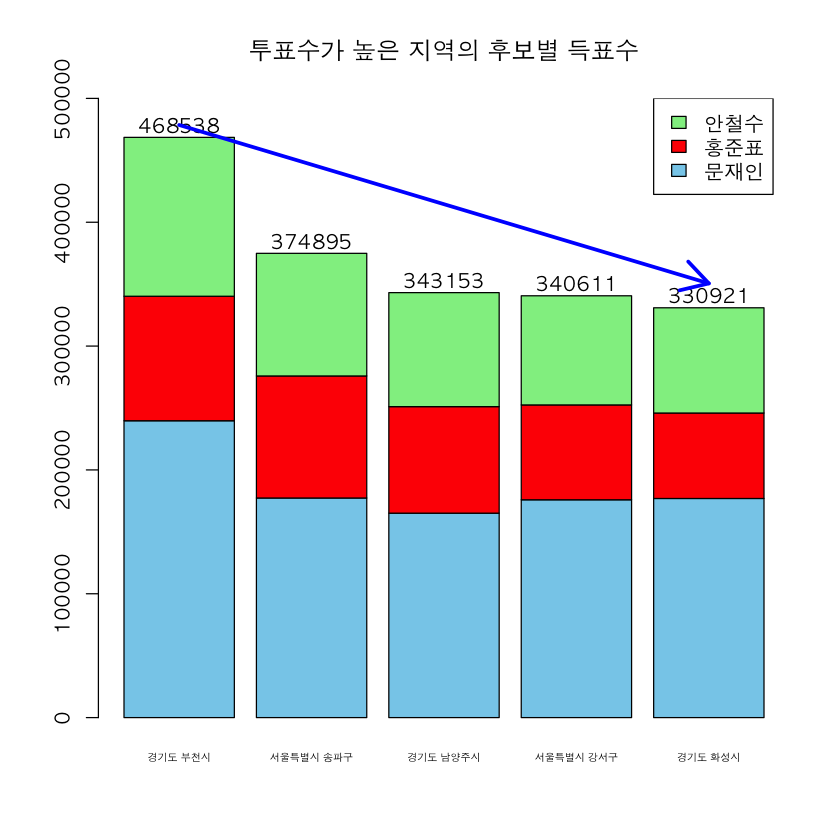

In [289]:
options(warn = -1)
par(family = "AppleGothic")
options(scipen = 100)


barplot(elec_top5_matrix,
       main = "투표수가 높은 지역의 후보별 득표수",
       ylim = c(0, 500000),
       cex.names = 0.5,
       legned.text = T,
       col = c("sky blue", "red", "light green")
       )

for(i in 0:4){
    text(0.7+ 1.2* i ,sum(elec_top5_matrix[,i+1]) + 10000, sum(elec_top5_matrix[,i+1]))
}
 arrows(0.7, sum(elec_top5_matrix[,1]) + 10000, 0.7+ 1.2*4,sum(elec_top5_matrix[,4]) + 10000, col = 'blue', lwd ='3')
legend(5,500000,
       c('안철수', '홍준표', '문재인'),
       #col = c("sky blue", "red", "light green"), #필요없음 fill 쓸때
       fill = c("light green", "red", "sky blue"),
      )

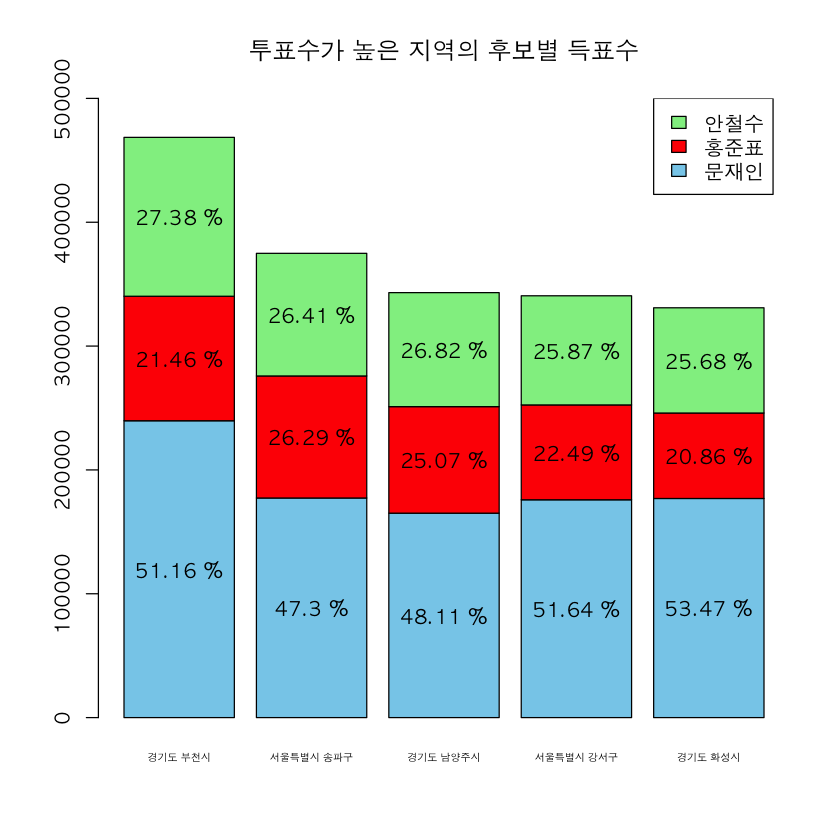

In [357]:
options(warn = -1)
par(family = "AppleGothic")
options(scipen = 100)


barplot(elec_top5_matrix,
       main = "투표수가 높은 지역의 후보별 득표수",
       ylim = c(0, 500000),
       cex.names = 0.5,
       legned.text = T,
       col = c("sky blue", "red", "light green")
       )



for (i in 0:4){
    text(0.7 + 1.2*i ,elec_top5_matrix[1,i+1]/2, paste(round(elec_top5_matrix[1,i+1]/sum(elec_top5_matrix[,i+1]) * 100,2),"%"))
    text(0.7 + 1.2*i ,elec_top5_matrix[1,i+1] + elec_top5_matrix[2,i+1] / 2, paste(round(elec_top5_matrix[2,i+1]/sum(elec_top5_matrix[,i+1]) * 100,2),"%"))
    text(0.7 + 1.2*i ,elec_top5_matrix[1,i+1] + elec_top5_matrix[2,i+1] +elec_top5_matrix[3,i+1] / 2, paste(round(elec_top5_matrix[3,i+1]/sum(elec_top5_matrix[,i+1]) * 100,2),"%"))

}


legend(5,500000,
       c('안철수', '홍준표', '문재인'),
       #col = c("sky blue", "red", "light green"), #필요없음 fill 쓸때
       fill = c("light green", "red", "sky blue"),
      )

In [358]:
library(ggplot2)
# 제일 최신의 plot이다. 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


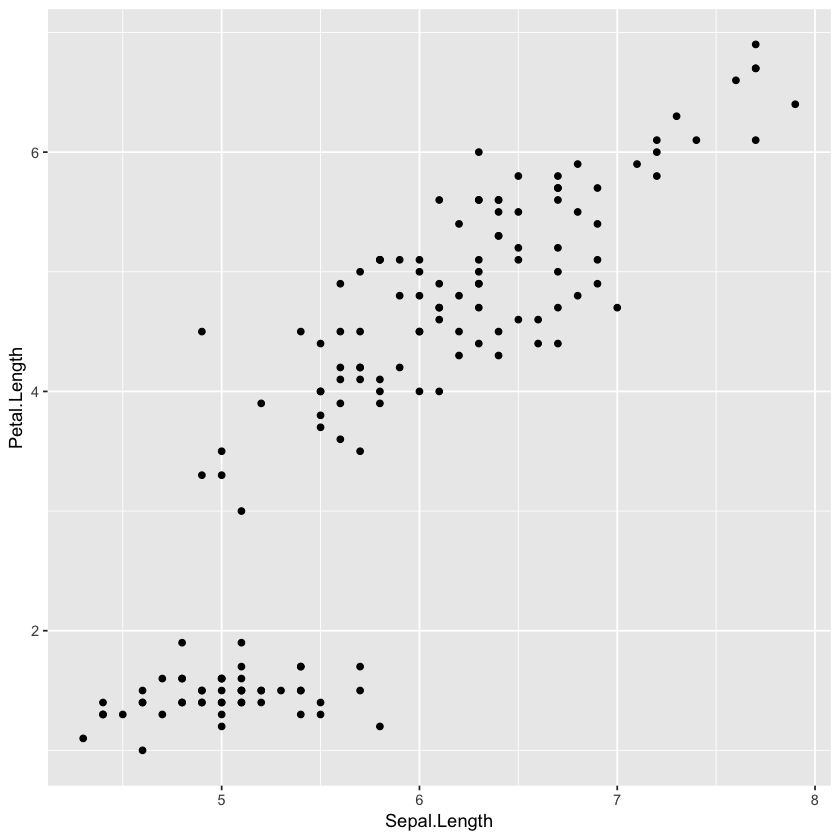

In [359]:
# qplot()
qplot(Sepal.Length, Petal.Length, data = iris)

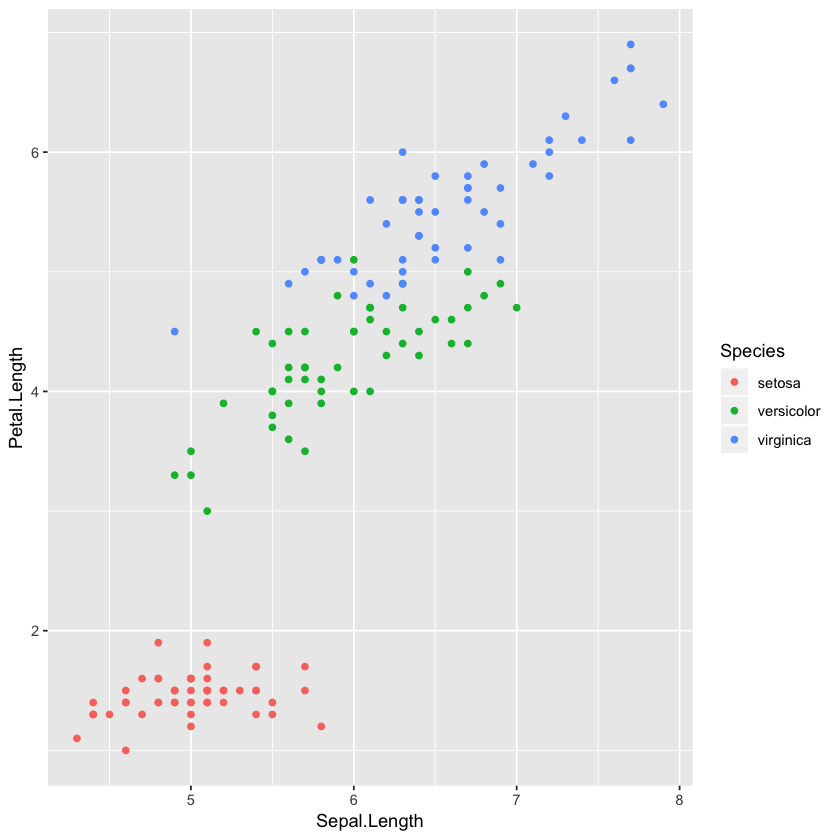

In [361]:
# color 를 문자뿐아니라 숫자값으로도 가지고 있다. 
qplot(Sepal.Length, Petal.Length, data = iris, col = Species)

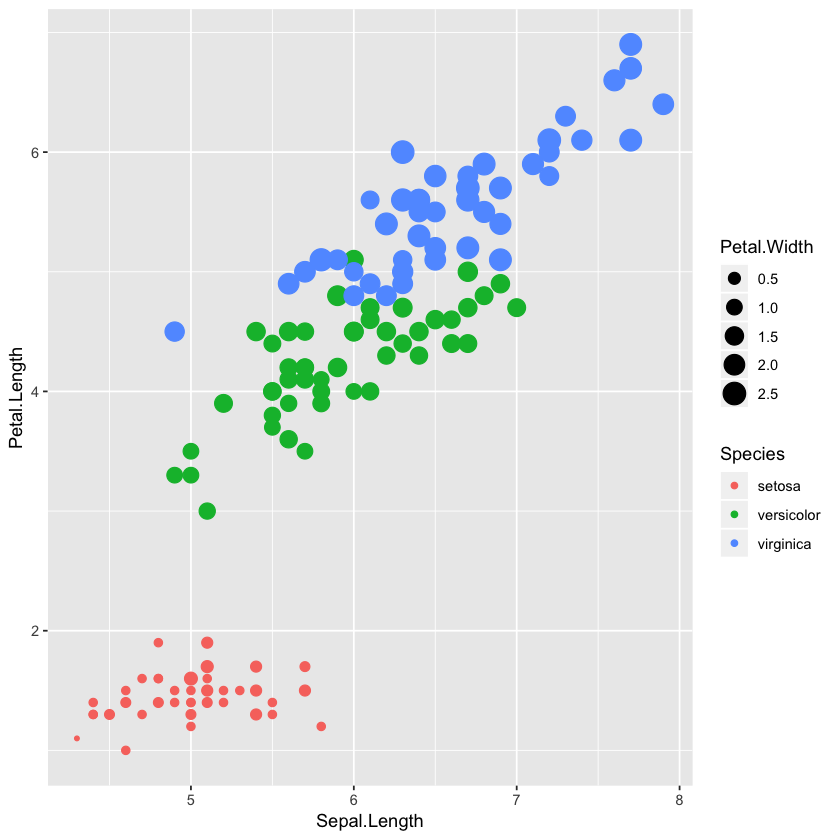

In [362]:
# 보통 위의 값까지 (2차원) 쓸수있지만 3차원처럼 사이즈가 틀리게 쓸수있다.
qplot(Sepal.Length, Petal.Length, data = iris, col = Species, size = Petal.Width)

# 수학 함수의 시각화
- y = x^2 을 시각화 하겠다?

In [363]:
f <- function(x){
    y = x ^ 2
    return(y)
}

In [364]:
x <- 1:3
f(x)

[1] 1 4 9

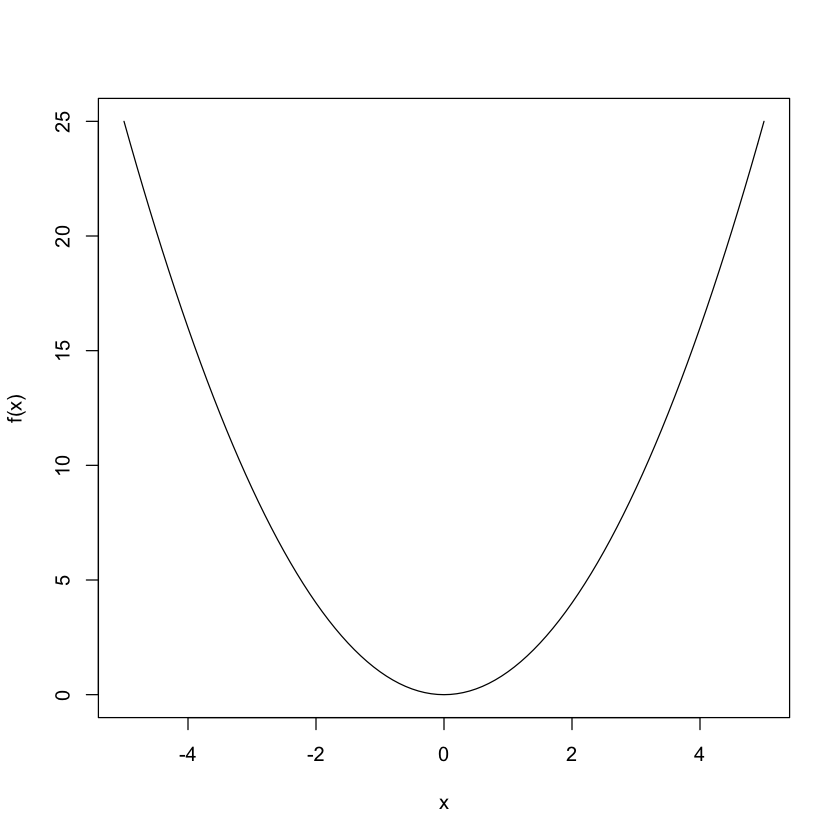

In [365]:
# -5 ~ 5 까지 0.1 씩 증가
x <- seq(-5, 5, 0.1)
# x 는 독립 변수 y 는 종속 변수
plot(x, f(x), type = 'l')


In [366]:
# y = e^(-x) - 4x^2 + x + 3|x| - 3 
# abs(-10) 절대값

In [367]:
f <- function(x){
    y = exp(-x) - 4 * x ^ 2 + x + 3 * abs(x) - 3
    return(y)
}

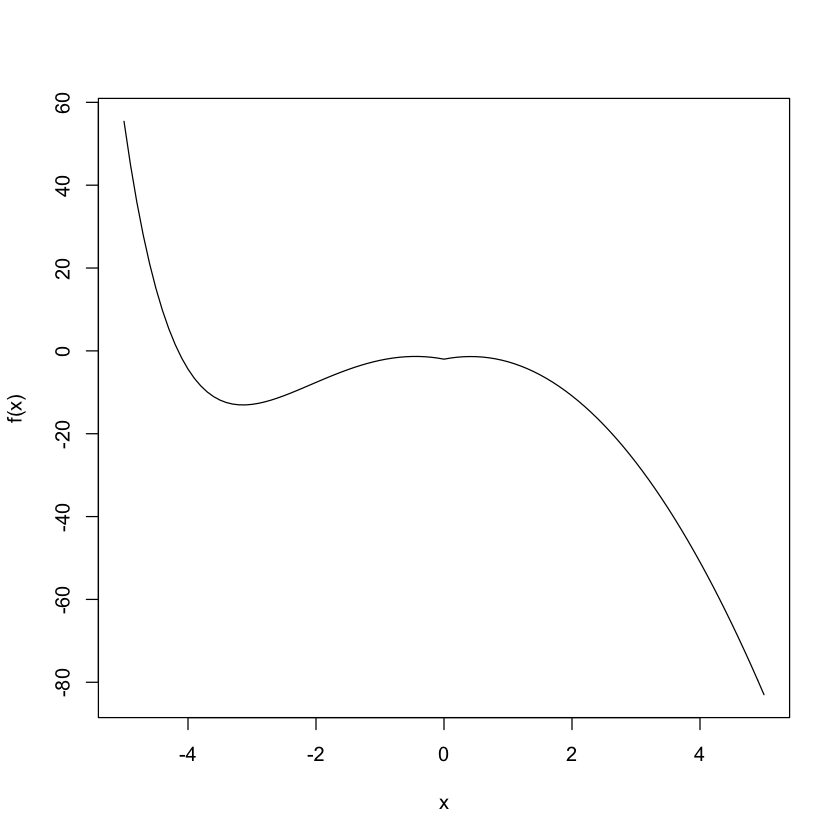

In [368]:
plot(x, f(x), type = 'l')

In [376]:
# y = x ^ 2 + 2x + 3
f <- function(x){
    y = x ^ 2 + 2 * x + 3
    return(y)
}

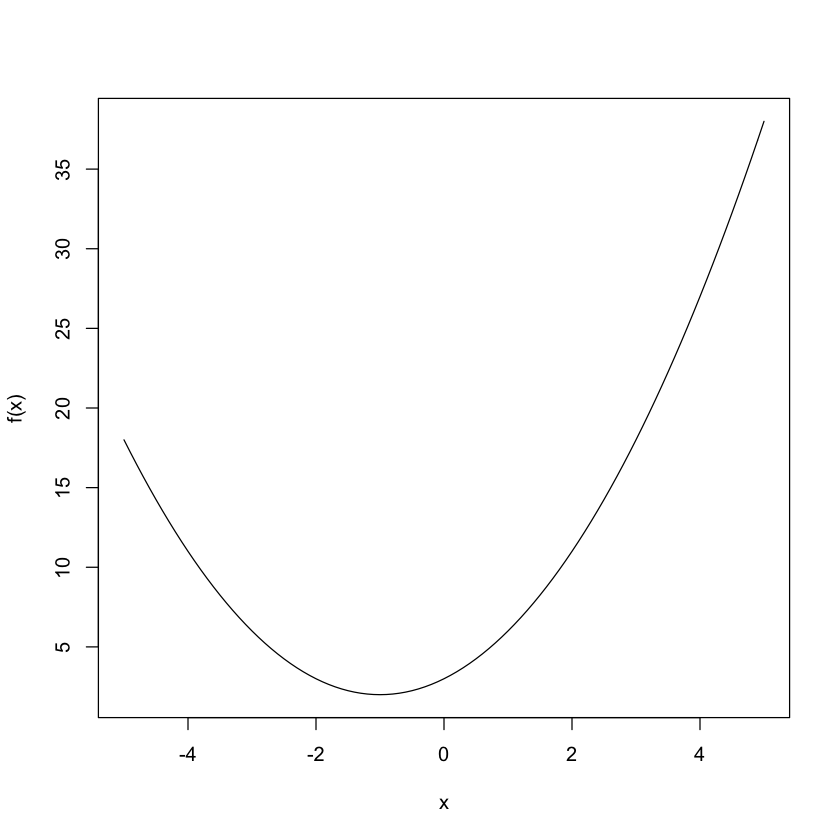

In [377]:
plot(x, f(x), type = 'l')

--- 
# 기초 통계량 산출

In [378]:
cafe <- read.csv("../Data/coffee.csv")
head(cafe)

seq,Day.Code,Day.of.Week,Coffee,Fruit.Cup
1,1,Mon,3,1
2,2,Tue,8,0
3,3,Wed,11,0
4,4,Thu,24,0
5,5,Fri,5,5
6,6,Sat,10,0


In [379]:
# 커피에 대한 빈도수 보기
# 도데체 얼마씩 팔리느냐?
table(cafe$Coffee)


 3  5  8  9 10 11 13 14 18 22 24 25 27 29 33 34 49 50 51 53 54 56 59 
 1  2  1  1  1  2  1  1  1  1  1  1  1  2  1  2  1  2  1  1  1  1  1 

In [382]:
# 범위 빈도수 
# 10일단위 , 20일단위 몇잔 팔았냐?
coffee_Range <- seq(0, 60, 10) # 범위를 만든것 10일 씩 단위
# 범위 짜르는것
# head(cafe)의 날짜 마다 범위
table(cut(cafe$Coffee, breaks = coffee_Range))
table(cut(cafe$Coffee, breaks = coffee_Range, right = F))


 (0,10] (10,20] (20,30] (30,40] (40,50] (50,60] 
      6       5       6       3       3       5 


 [0,10) [10,20) [20,30) [30,40) [40,50) [50,60) 
      5       6       6       3       1       7 

In [383]:
# 줄기 - 잎 그림 함수
stem(cafe$Coffee)

#   0 | 35589
#   1 | 011348
#   2 | 245799
#   3 | 344
#   4 | 9
#   5 | 0013469
#  3,5,5,8,9
# 10,11,11,13,14,18


  The decimal point is 1 digit(s) to the right of the |

  0 | 35589
  1 | 011348
  2 | 245799
  3 | 344
  4 | 9
  5 | 0013469



In [386]:
# Coffe의 평균과 편차
ca <- cafe$Coffee
# 1.평균
ca.m <- mean(ca)
# 2. 표준 편차
ca.sd <- sd(ca)
 
paste("커피 평균 판매량: ", round(ca.m, 1), "커피 표준편차", round(ca.sd,3))

[1] "커피 평균 판매량:  28.1 커피 표준편차 18.269"

In [387]:
# 쥬스의 평균과 표준편차
ju <- cafe$Fruit.Cup
# 1.평균
ju.m <- mean(ju)
# 2. 표준 편차
ju.sd <- sd(ju)
 
paste("쥬스 평균 판매량: ", round(ju.m, 1), "쥬스 표준편차", round(ju.sd,3))

[1] "쥬스 평균 판매량:  6.1 쥬스 표준편차 6.549"

In [393]:
# 커피와 쥬스의 변동계수
ca.cv <- ca.sd /ca.m
ju.cv <- ju.sd /ju.m
paste("커피의 변동계수: ", ca.cv, "쥬스의 변동계수", ju.cv)

[1] "커피의 변동계수:  0.650819793181814 쥬스의 변동계수 1.07858584752233"

In [389]:
sort(cafe$Coffee)

[1]  3  5  5  8  9 10 11 11 13 14 18 22 24 25 27 29 29 33 34 34 49 50 50 51 53
[26] 54 56 59

In [390]:
sort(cafe$Fruit.Cup)

[1]  0  0  0  0  0  0  0  0  0  1  2  3  3  4  5  5  7  7  7  7  8 12 13 15 15
[26] 15 18 23

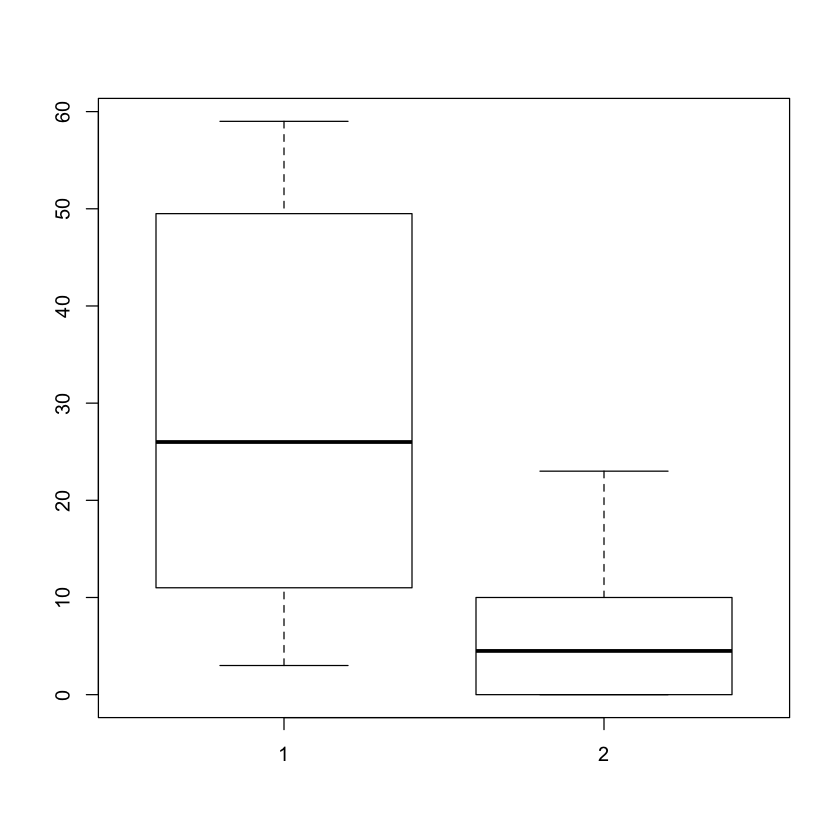

In [394]:
boxplot(cafe$Coffee,cafe$Fruit.Cup)

--- 
# 가설 검정

### 카이제곱 검정
- 통계쪽 데이터 나오는게 변수 두개를 비교한다.           
: 두 범주형 변수가 서로 상관이 있는지 판단하는 통계적 검정 방법

### child 별 장난감 보유 현황 
- 귀무가설 : 차이가 없다, 당연하다의 의미                       
          child1과 child2의 장난감 보유수에 대해 만족도는 차이가 없다. 
          
*** 귀무가설에 반대되는 가설
- 대림가설 : child1과 child2의 장난감 보유수에 대한 만족도의 차이가 있다.


In [396]:
# child별 장난감 보유 현황
child1 <- c(5,11,1)
child2 <- c(4,7,3)

In [397]:
Toy <- cbind(child1,child2)
Toy

child1,child2
5,4
11,7
1,3


In [399]:
rownames(Toy) <- c("Car", "Truck", "Doll")
Toy

,child1,child2
Car,5,4
Truck,11,7
Doll,1,3


In [400]:
# 카이제곱 검정 실시
chisq.test(Toy)
# 분석 결과가 나온것.
# 모든 데이터중에 p-value 가 젤 중요하다


	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론
p-value = 0.4219 > 0.05(유의수준, 95% 신뢰구간) -> 귀무가설 채택        

p-value는 0에 가까울수록 좋다, 미리 정해진 유의수준(일반적으로 0.05)보다    
작으면 '대립가설'을 채택하고, 크면 '귀무가설'을 채택한다

### Message : 카이제곱의 근사값이 정확하지 않을수도 있다.
- 언제 발생하는가? : 데이터량이 적은 경우 발생 -> 피셔검정(검정방법)

In [402]:
# Fisher 검정
fisher.test(Toy)


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


# p-value = 0.5165 > 0.05 -> 귀무가설

In [403]:
cor(child1, child2)

[1] 0.9862414